In [1]:
import json
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
import plotly.io as pio
pio.renderers.default = 'browser'

In [3]:
karnataka = json.load(open("karnataka.geojson", "r"))

In [4]:
dist_id_map = {}
for feature in karnataka["features"]:
    feature["id"] = feature["properties"]["pc_code"]
    dist_id_map[feature["properties"]["pc_name"]] = feature["id"]
dist_id_map

{'Koppal': 8,
 'Haveri': 10,
 'Davanagere': 13,
 'Chikkaballapura': 27,
 'Shimoga': 14,
 'Hassan': 16,
 'Bellary': 9,
 'Udupi Chikmagalur': 15,
 'Tumkur': 19,
 'Kolar': 28,
 'Bangalore Rural': 23,
 'Chitradurga': 18,
 'Bagalkot': 3,
 'Bidar': 7,
 'Uttara Kannada': 12,
 'Bangalore North': 24,
 'Mandya': 20,
 'Gulbarga': 5,
 'Bijapur': 4,
 'Chikkodi': 1,
 'Raichur': 6,
 'Bangalore South': 26,
 'Bangalore Central': 25,
 'Dharwad': 11,
 'Dakshina Kannada': 17,
 'Mysore': 21,
 'Chamrajnagar': 22,
 'Belgaum': 2}

In [5]:
df = pd.read_csv('CovidData2.csv')
df["id"] = df["District Name"].apply(lambda x: dist_id_map[x])

In [6]:
df

,District Name,Today’s Positives,Total Positives,Today’s Discharges,Total Discharges,Total Active Cases,Today’s Reported Covid Deaths,Total Covid Deaths,Death due to Non- Covid reasons,id
0,Bagalkot,584,28584,1047,21592,6753,14,239,0,3
1,Bellary,1622,72677,3586,54112,17518,28,1047,0,9
2,Belgaum,1502,45059,614,34206,10464,7,389,0,2
3,Bangalore Rural,1265,43100,1318,28499,14256,10,345,0,23
4,Bangalore Central,13402,1042714,7379,666582,366791,94,9340,1,25
5,Bidar,185,22612,285,19510,2769,6,329,4,7
6,Chamrajnagar,535,20416,793,15497,4634,8,274,11,22
7,Chikkaballapura,595,30249,739,23242,6798,5,208,1,27
8,Chitradurga,454,20179,207,17561,2516,4,102,0,18
9,Dakshina Kannada,1787,63357,1490,49355,13194,3,806,2,17


<AxesSubplot:>

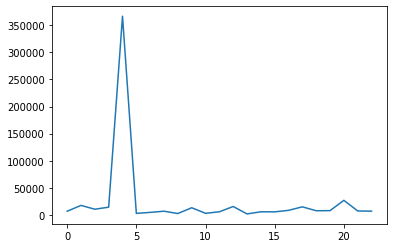

In [7]:
df["Total Active Cases"].plot()

<AxesSubplot:>

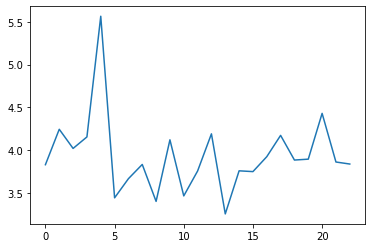

In [8]:
df["TSA Scaled"] = np.log10(df["Total Active Cases"])
df["TSA Scaled"].plot()

In [10]:
fig = px.choropleth(
    df,
    locations="id",
    geojson=karnataka,
    color="TSA Scaled",
    hover_name="District Name",
    hover_data=["Total Active Cases"],
    title="Active Covid Cases in Karnatat",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

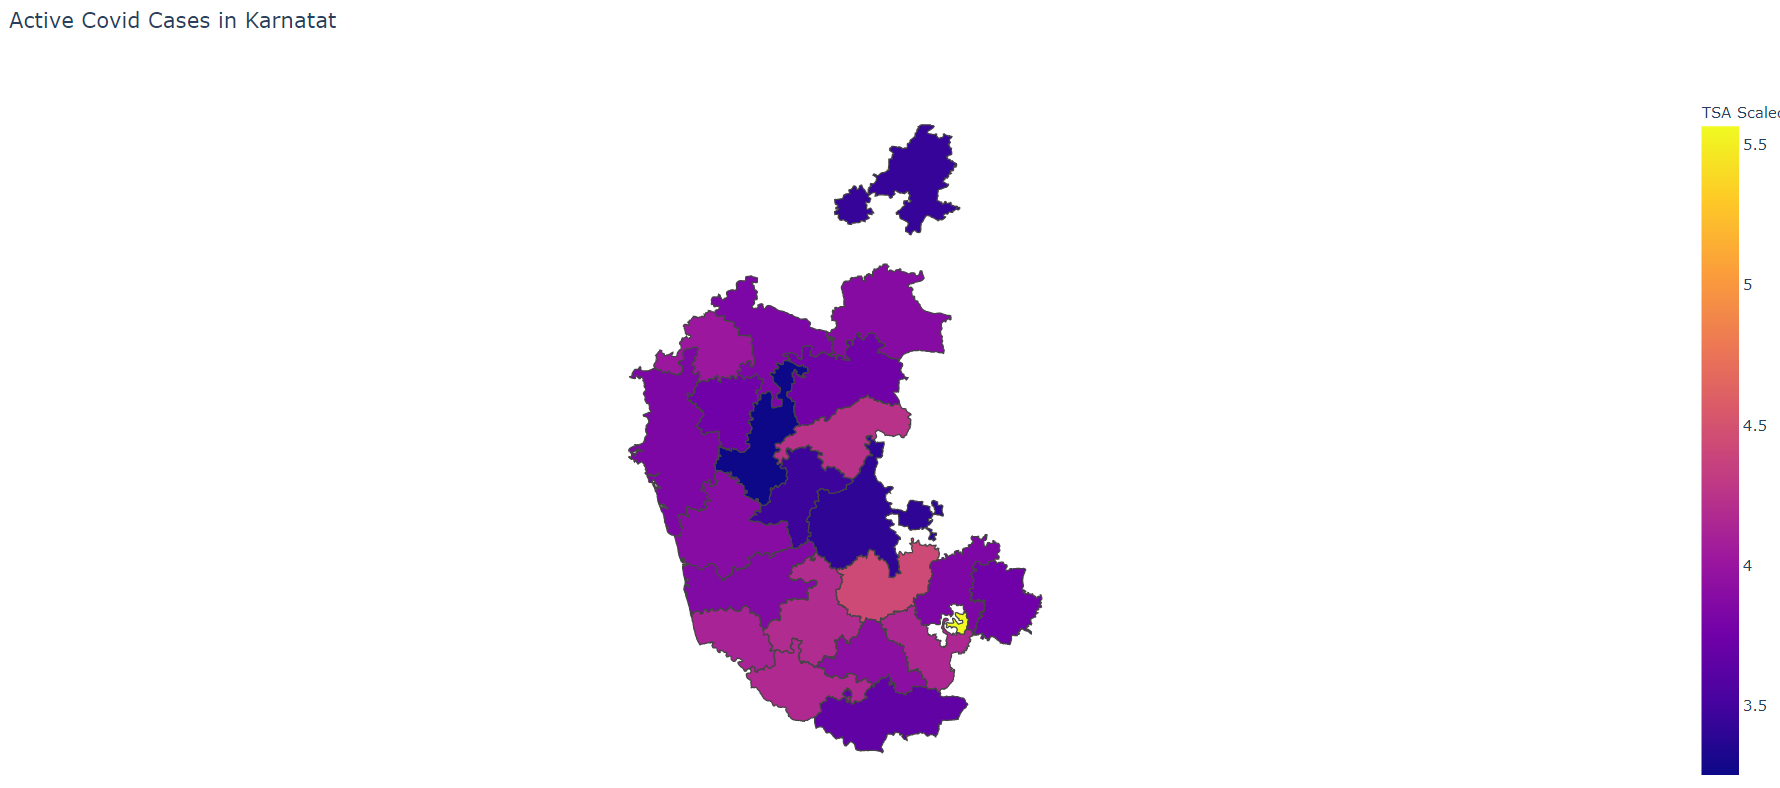